In [1]:
# !pip install keras --upgrade
# uncomment the above line if you don't have keras 3 installed
import keras
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,46021,84772,Male,Loyal Customer,44,Business travel,Business,3028,2,2,...,4,4,4,4,3,4,5,6,5.0,satisfied
1,94940,120186,Male,Loyal Customer,42,Business travel,Business,1325,2,1,...,2,2,2,2,5,2,4,0,0.0,satisfied
2,3013,105475,Female,Loyal Customer,42,Business travel,Business,3336,3,2,...,4,4,4,4,5,4,4,0,0.0,satisfied
3,72514,73109,Female,Loyal Customer,60,Business travel,Business,2174,1,5,...,1,1,1,1,3,1,1,0,0.0,neutral or dissatisfied
4,60418,49438,Female,Loyal Customer,43,Business travel,Eco,421,5,1,...,3,3,5,3,4,3,5,0,0.0,satisfied


## Preprocessing :

In [4]:
# Preprocessing step
# TODO
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [7]:
train.drop(['Unnamed: 0','id','Arrival Delay in Minutes'],axis=1,inplace=True)
test.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [8]:
train['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [9]:
train['Class'].unique()

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

In [10]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [11]:
# order-encode :
encode_dict = {'Business':2, 'Eco':0, 'Eco Plus':1}
test['Class'].replace(encode_dict,inplace=True)
train['Class'].replace(encode_dict,inplace=True)

In [13]:
encode_dict={'Loyal Customer':1, 'disloyal Customer':0}

test['Customer Type'].replace(encode_dict,inplace=True)
train['Customer Type'].replace(encode_dict,inplace=True)


In [14]:
# Categorical encoding 


dummy_columns = ['Type of Travel']
train = pd.get_dummies(train, columns = dummy_columns) 
test = pd.get_dummies(test, columns = dummy_columns) 


In [17]:
dummy_columns = ['Gender']
train = pd.get_dummies(train, columns = dummy_columns) 
test = pd.get_dummies(test, columns = dummy_columns) 


In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train['satisfaction']=le.fit_transform(train['satisfaction'])

In [18]:
train.head()

,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Type of Travel_Business travel,Type of Travel_Personal Travel,Gender_Female,Gender_Male
0,1,44,2,3028,2,2,2,2,4,4,...,4,3,4,5,6,1,1,0,0,1
1,1,42,2,1325,2,1,2,2,3,4,...,2,5,2,4,0,1,1,0,0,1
2,1,42,2,3336,3,2,3,3,5,4,...,4,5,4,4,0,1,1,0,1,0
3,1,60,2,2174,1,5,5,5,1,3,...,1,3,1,1,0,0,1,0,1,0
4,1,43,0,421,5,1,1,1,1,1,...,3,4,3,5,0,1,1,0,1,0


In [20]:
train.columns

Index(['Customer Type', 'Age', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'satisfaction',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [79]:
test.drop([ 'Arrival Delay in Minutes'],axis=1,inplace=True)

In [21]:
X = train.drop(['satisfaction'],axis=1)
y = train['satisfaction']

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2,random_state=42)

In [193]:
y_train.value_counts()

0    52973
1    40540
Name: satisfaction, dtype: int64

In [194]:
y_valid.value_counts()

0    5906
1    4485
Name: satisfaction, dtype: int64

## Getting Distribution of data to find best scaler 

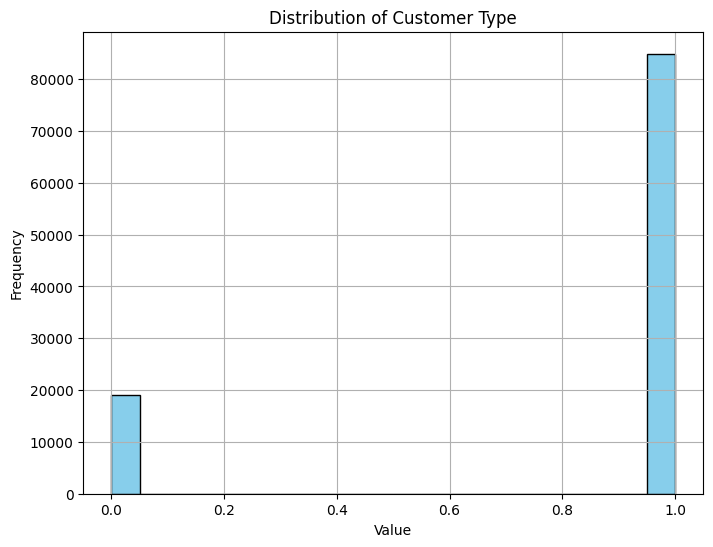

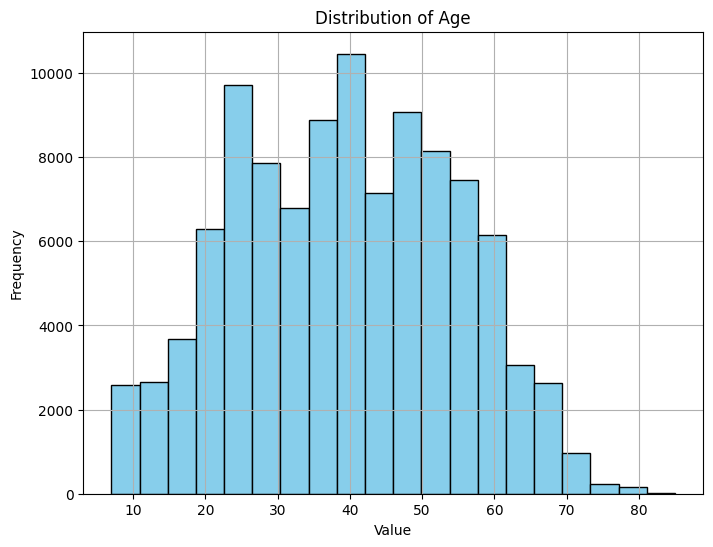

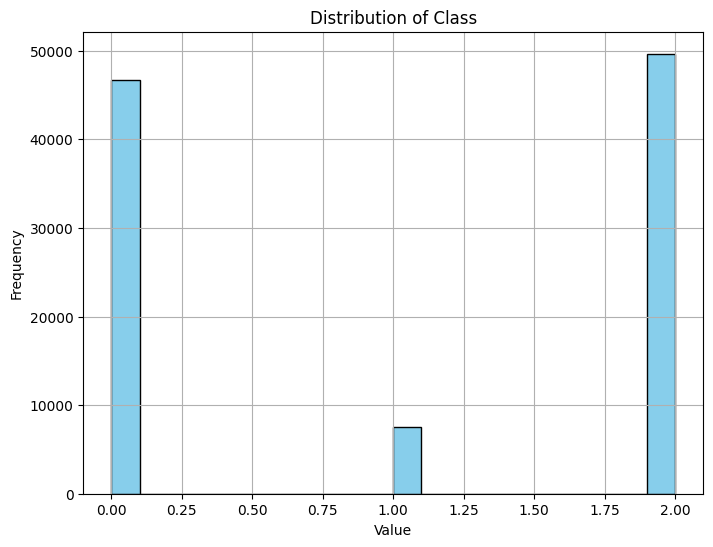

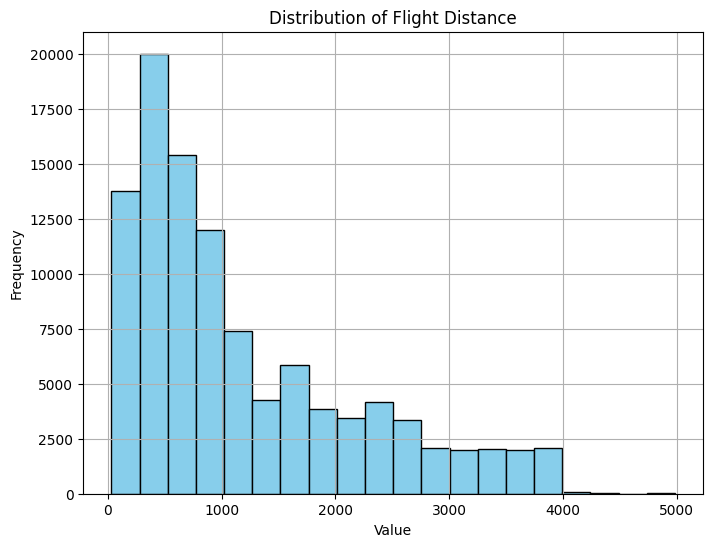

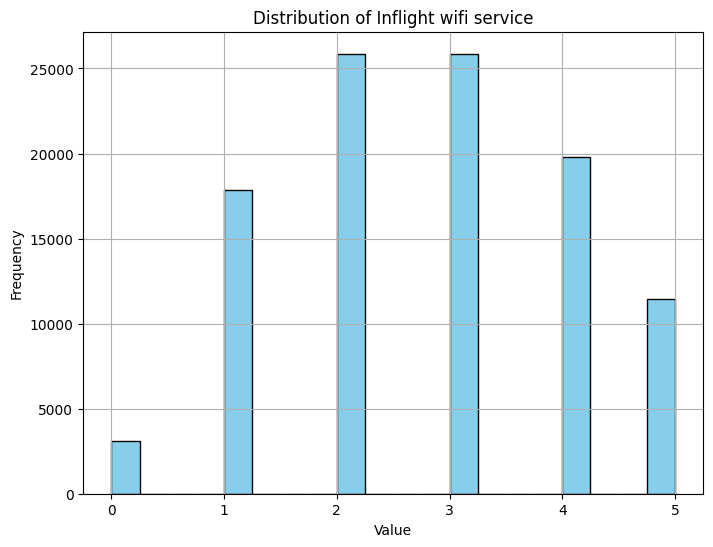

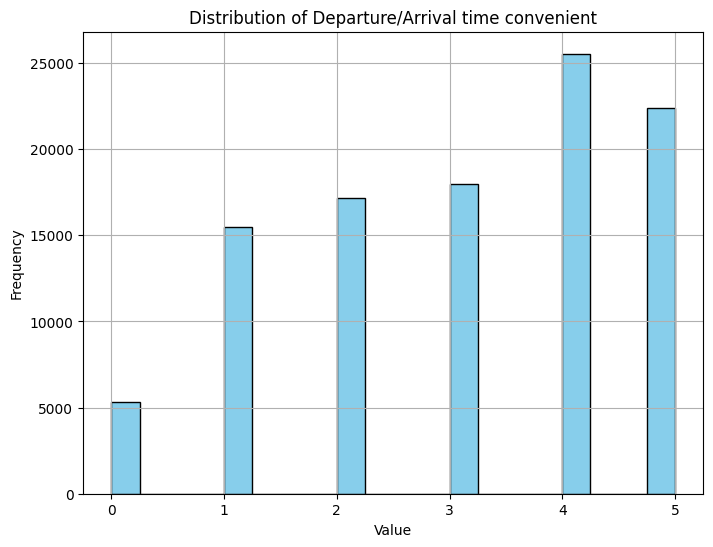

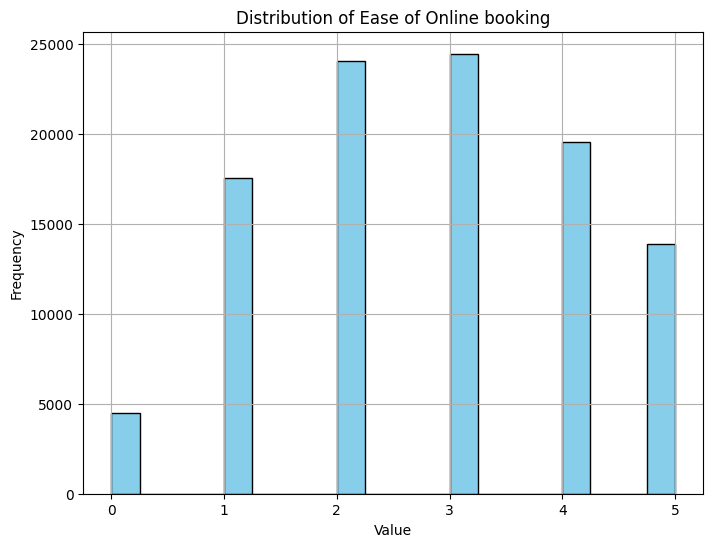

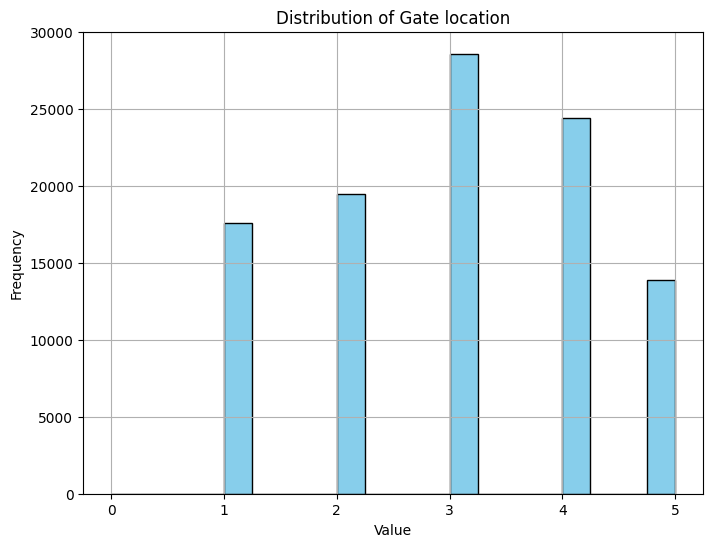

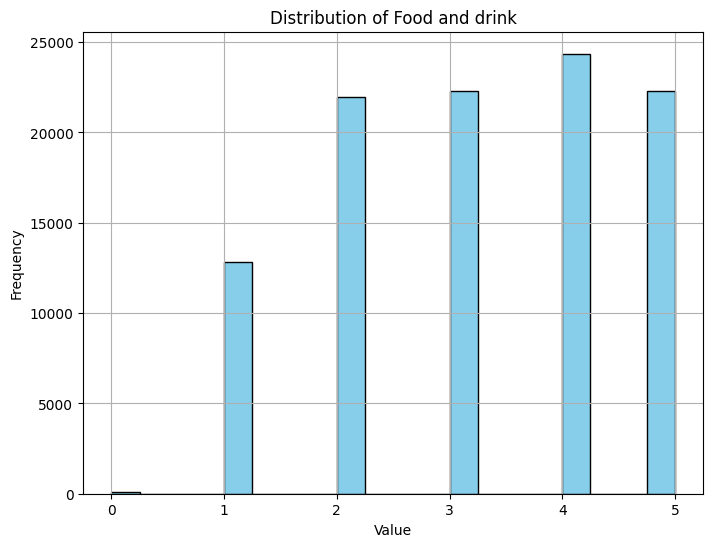

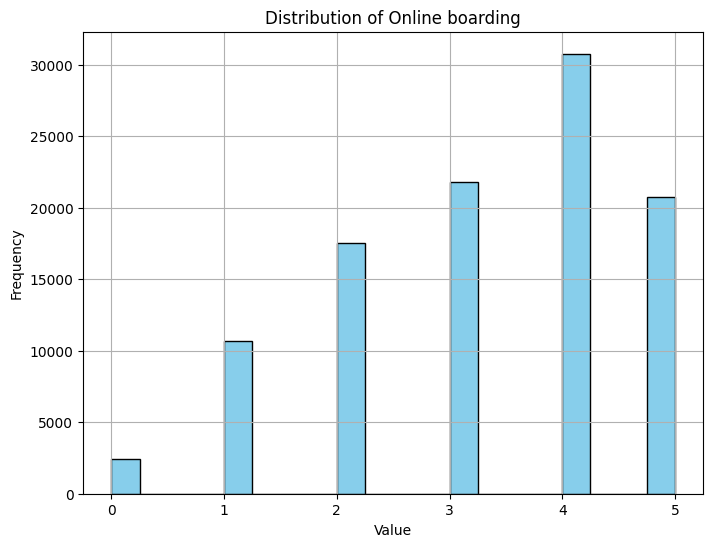

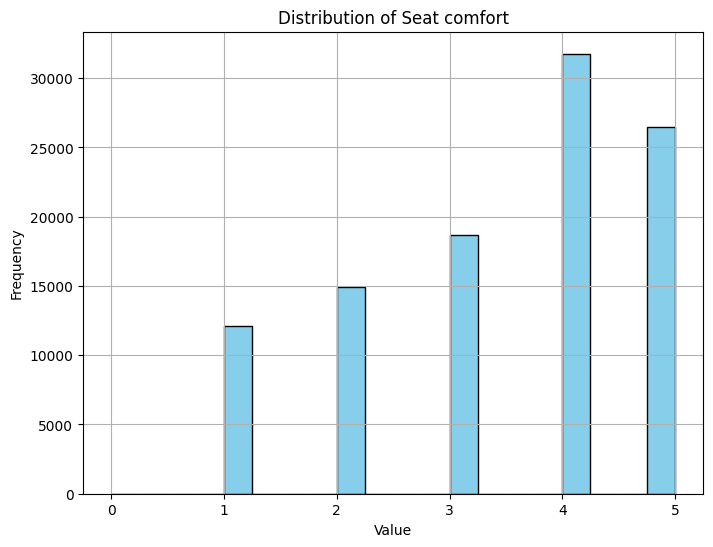

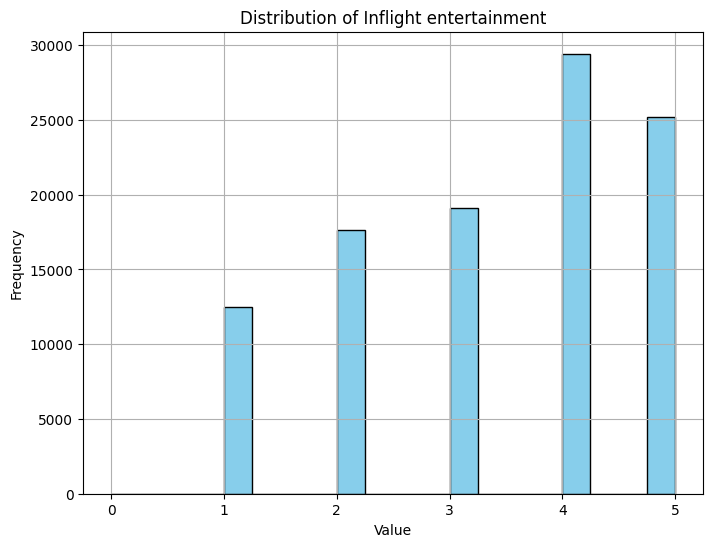

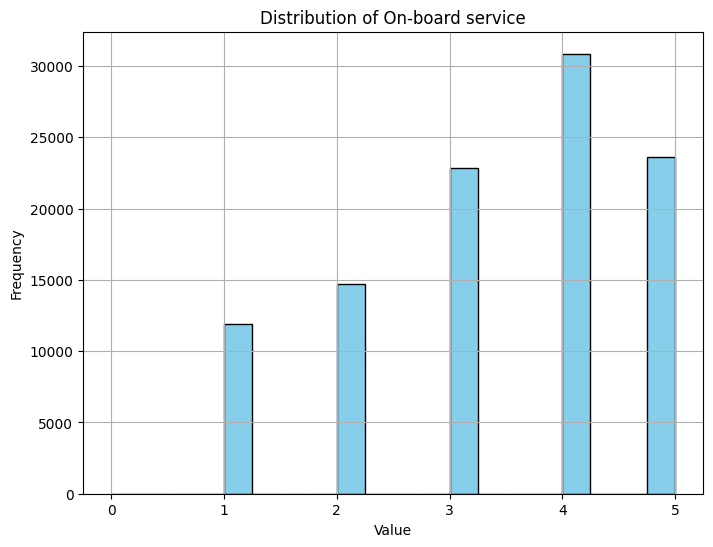

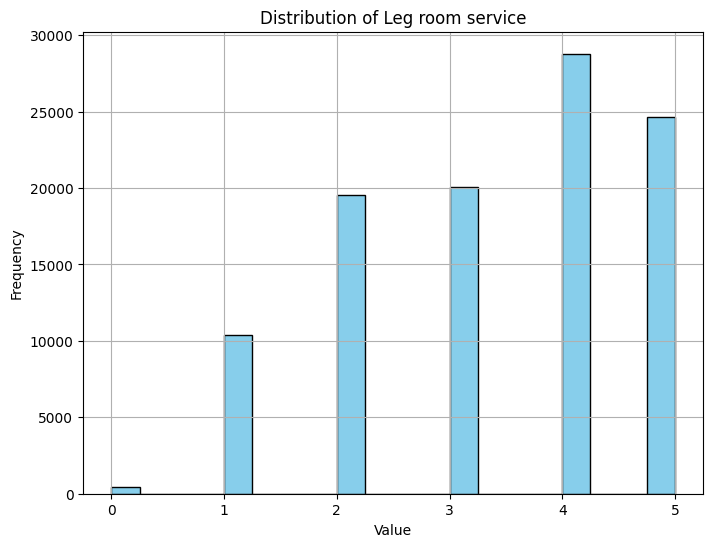

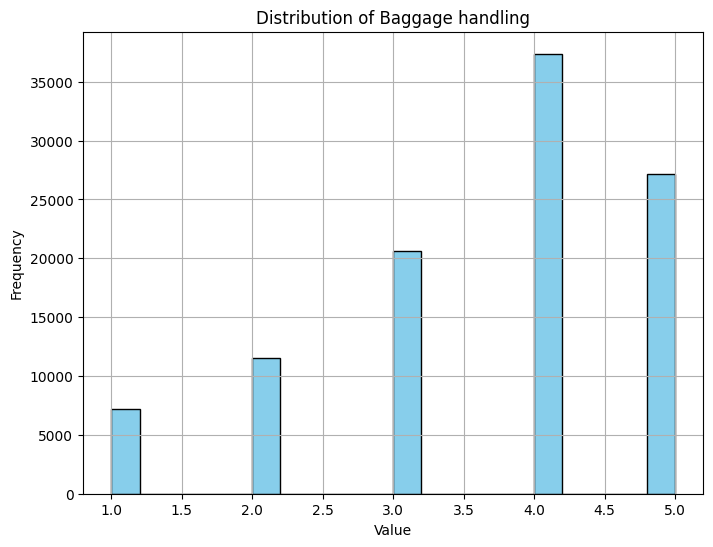

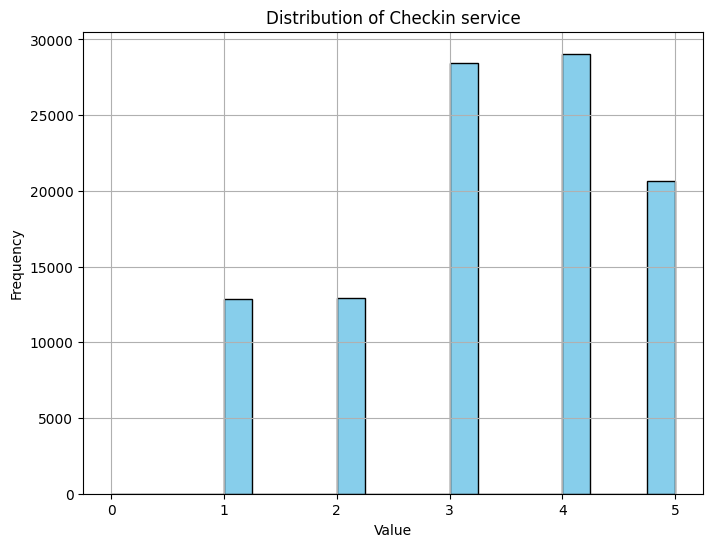

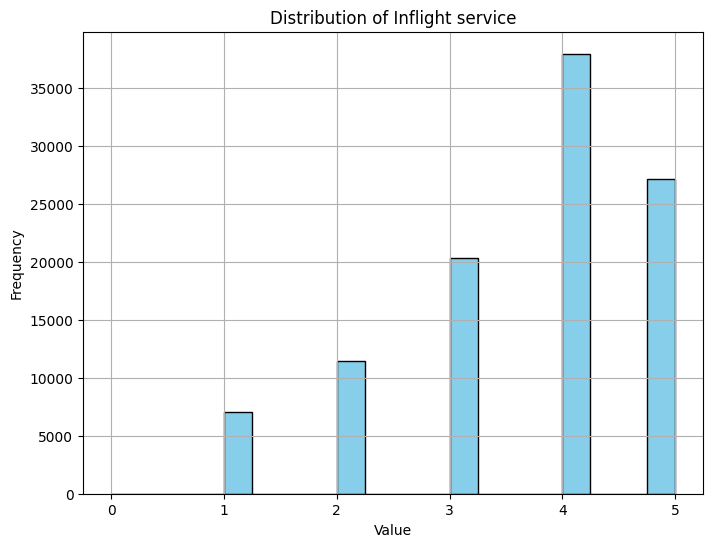

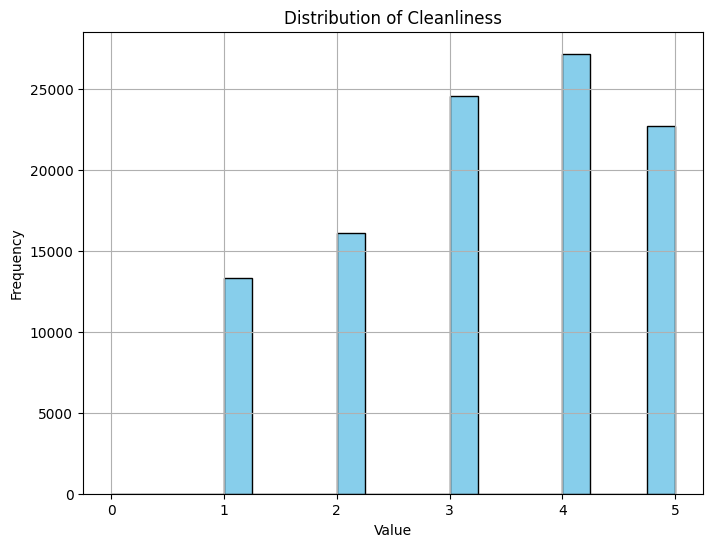

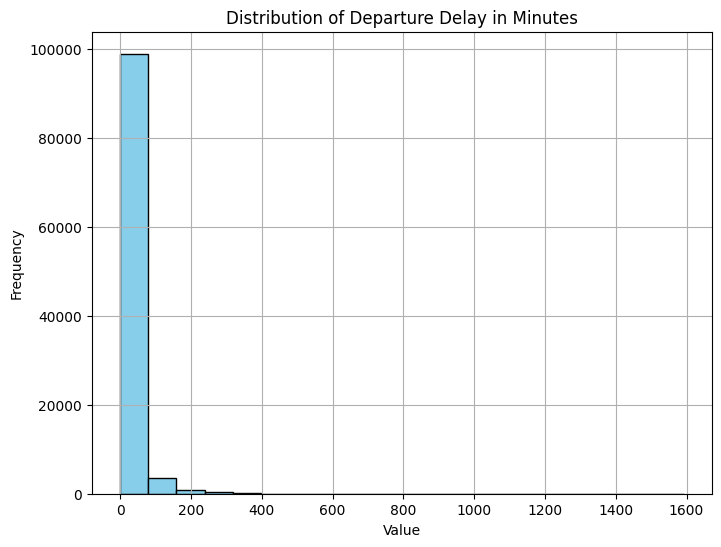

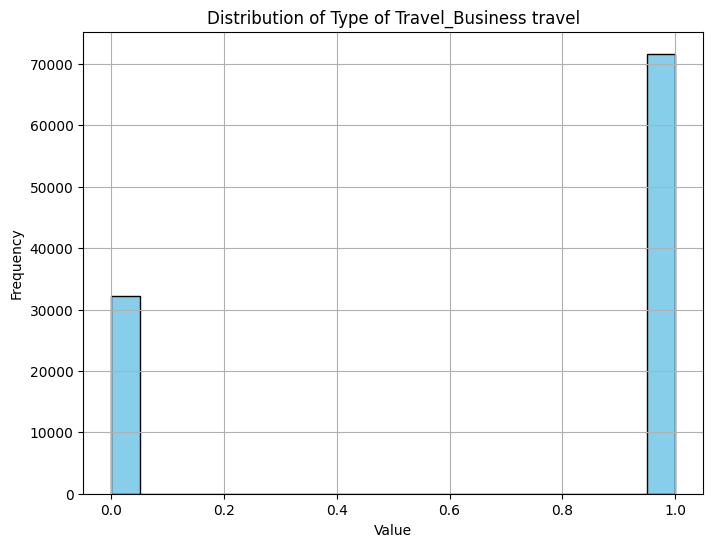

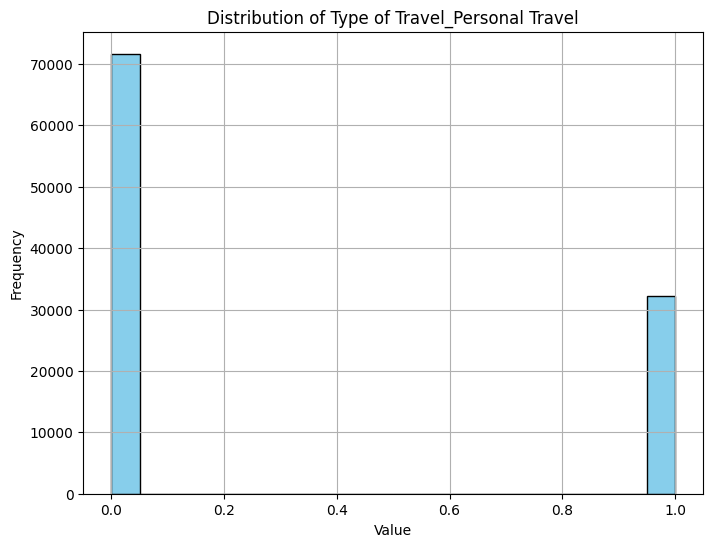

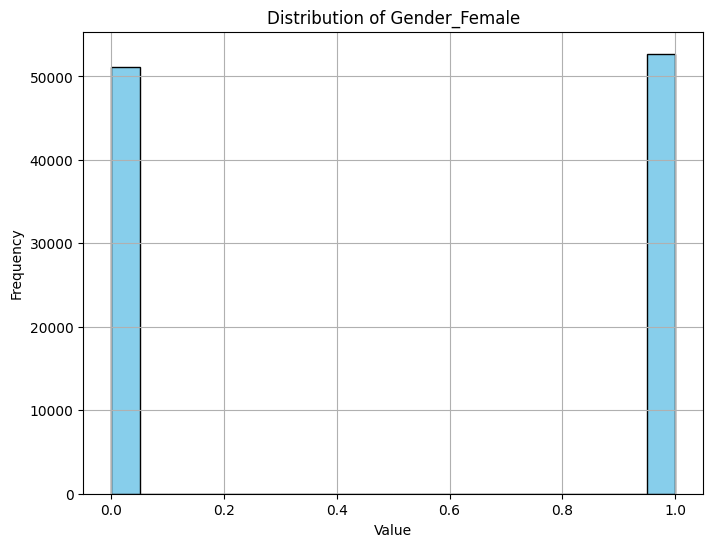

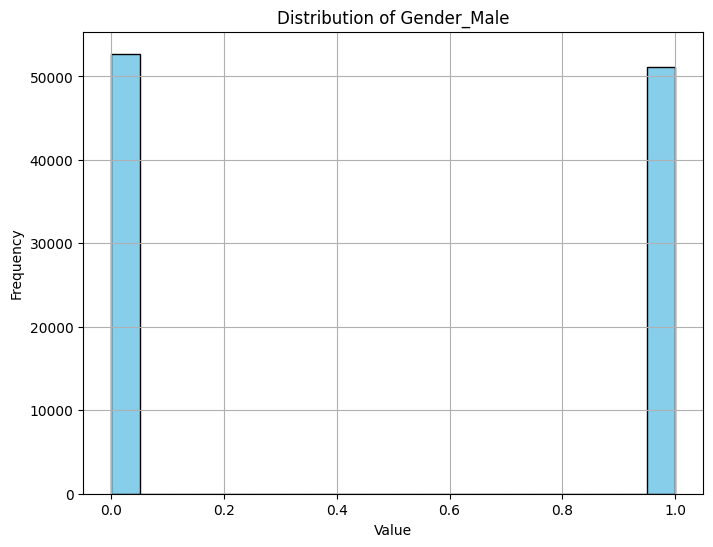

In [55]:
import matplotlib.pyplot as plt

# Assuming X is your pandas DataFrame
# Iterate over each column and plot its histogram
for column in X.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(X[column], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [223]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_valid)

In [224]:
# Model design
# TODO
from keras import regularizers

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.6))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [225]:
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)                    │ (None, 100)                 │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,601 (29.69 KB)

 Non-trainable params: 100 (400.00 B)

In [226]:
model.compile(optimizer="adam",
              loss = keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [228]:
history = model.fit(X_train_scaled, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_test_scaled, y_valid),)

# Evaluate the model
loss, accuracy = model.evaluate(X_valid, y_valid)
print("Validation Accuracy:", accuracy)

Epoch 1/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9534 - loss: 0.1147 - val_accuracy: 0.9583 - val_loss: 0.0997
Epoch 2/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9535 - loss: 0.1113 - val_accuracy: 0.9583 - val_loss: 0.0981
Epoch 3/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9548 - loss: 0.1112 - val_accuracy: 0.9586 - val_loss: 0.0985
Epoch 4/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9560 - loss: 0.1084 - val_accuracy: 0.9573 - val_loss: 0.0978
Epoch 5/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9557 - loss: 0.1062 - val_accuracy: 0.9592 - val_loss: 0.0965
Epoch 6/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9565 - loss: 0.1058 - val_accuracy: 0.9577 - val_loss: 0.0968
Epoch 7/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9564 - loss: 0.1044 - val_accuracy: 0.9594 - val_loss: 0.0947
Epoch 8/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9582 - loss: 0.1024 - 

### ML model :

#### U can use simple ML model to find that your DL model weakness is the preprocessing part or is the architecture of model 

### Using KNN Model 

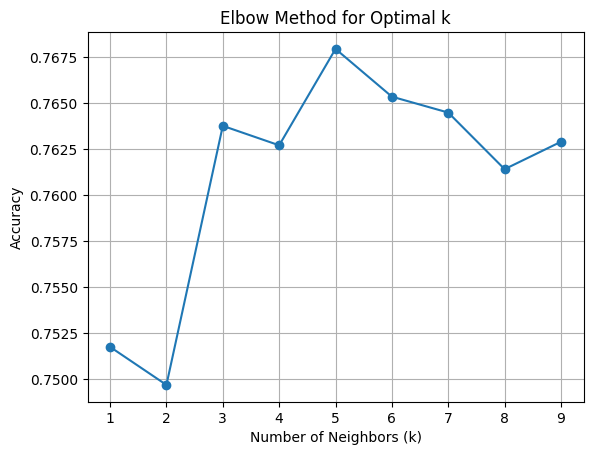

In [66]:
import matplotlib.pyplot as plt

k_values = np.arange(1, 10)  # Adjust the range as needed

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over each value of k
for k in k_values:
    # Initialize KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_valid)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_valid, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_valid)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7637746017997209


In [229]:
test1=scaler.transform(test)

In [230]:


# Predictions from your model
predictions = model.predict(test1)

# Define a threshold for classification
threshold = 0.5

# Apply the threshold to classify predictions
satisfaction_predictions = ['satisfied' if pred >= threshold else 'neutral or dissatisfied' for pred in predictions]

# Create DataFrame for submission
submission = pd.DataFrame({'satisfaction': satisfaction_predictions})


812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step


In [232]:
submission['satisfaction'].value_counts()

neutral or dissatisfied    14942
satisfied                  11034
Name: satisfaction, dtype: int64

### Model accurcy on test data : 96.3